# 데이터 전처리

## 추정매출 2021~2023

In [105]:
import pandas as pd

# 파일 경로
file_paths = [
    'data/원본파일/(추정매출-상권)_2021년.csv',
    'data/원본파일/(추정매출-상권)_2022년.csv',
    'data/원본파일/(추정매출-상권)_2023년.csv'
]

# 각 CSV 파일을 DataFrame으로 읽어오기
dfs = [pd.read_csv(file_path, encoding='cp949') for file_path in file_paths]

# 모든 DataFrame을 합치기
merged_df = pd.concat(dfs, ignore_index=True)

# 결과 확인
print(f"Number of rows: {len(merged_df)}")
print(f"Number of columns: {len(merged_df.columns)}")

# 합쳐진 DataFrame을 CSV 파일로 저장
output_file_path = 'data/2021~2023/(추정매출-상권)_2021~2023.csv'
merged_df.to_csv(output_file_path, index=False, encoding='utf-8')

print(f"Merged data saved to {output_file_path}")

Number of rows: 228255
Number of columns: 55
Merged data saved to data/2021~2023/(추정매출-상권)_2021~2023.csv


## 그 중 편의점만

In [106]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/(추정매출-상권)_2021~2023.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# "서비스_업종_코드_명"이 '편의점'인 행 추출
selected_rows = df[df['서비스_업종_코드_명'] == '편의점']

# 추출된 데이터프레임을 새로운 CSV 파일로 저장
output_file_path = 'data/2021~2023/(추정매출-상권)_2021~2023(편의점).csv'
selected_rows.to_csv(output_file_path, index=False)

# 저장된 파일 확인
print(f"Convenience store data saved to '{output_file_path}'")

Convenience store data saved to 'data/2021~2023/(추정매출-상권)_2021~2023(편의점).csv'


## 나머지 파일도 2021~2023년

In [107]:
import os
import pandas as pd

# 파일 경로들 설정
file_paths = [
    'data/원본파일/(상주인구-상권).csv',
    'data/원본파일/(소득소비-상권).csv',
    'data/원본파일/(직장인구-상권).csv',
    'data/원본파일/(집객시설-상권).csv',
    'data/원본파일/(길단위인구-상권).csv'
]

# 저장할 디렉토리 생성
output_directory = 'data/2021~2023'
os.makedirs(output_directory, exist_ok=True)

# 파일별로 반복
for file_path in file_paths:
    # CSV 파일 불러오기 (cp949 인코딩 사용)
    df = pd.read_csv(file_path, encoding='cp949')
    
    # 조건에 맞는 행 추출
    selected_rows = df[df['기준_년분기_코드'].isin([20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233])]

    # 저장할 파일 경로 생성
    output_file_name = os.path.basename(file_path).replace('.csv', '_2021~2023.csv')
    output_file_path = os.path.join(output_directory, output_file_name)
    
    # 추출된 데이터프레임을 새로운 CSV 파일로 저장
    selected_rows.to_csv(output_file_path, index=False)

    # 저장된 파일 확인
    print(f"Filtered data saved to '{output_file_path}'")

Filtered data saved to 'data/2021~2023\(상주인구-상권)_2021~2023.csv'
Filtered data saved to 'data/2021~2023\(소득소비-상권)_2021~2023.csv'
Filtered data saved to 'data/2021~2023\(직장인구-상권)_2021~2023.csv'
Filtered data saved to 'data/2021~2023\(집객시설-상권)_2021~2023.csv'
Filtered data saved to 'data/2021~2023\(길단위인구-상권)_2021~2023.csv'


# 결측치 확인 및 처리

In [108]:
import pandas as pd

# 파일 경로 리스트 지정
file_paths = [
    'data/2021~2023/(길단위인구-상권)_2021~2023.csv',
    'data/2021~2023/(상주인구-상권)_2021~2023.csv',
    'data/2021~2023/(소득소비-상권)_2021~2023.csv',
    'data/2021~2023/(직장인구-상권)_2021~2023.csv',
    'data/2021~2023/(집객시설-상권)_2021~2023.csv',
]

# 각 파일을 불러와서 데이터프레임으로 저장
dataframes = [pd.read_csv(file, encoding='utf-8') for file in file_paths]

# 결측치 확인
for i, df in enumerate(dataframes):
    print(f"결측치 확인 - 데이터프레임 {i + 1}:")
    print(df.isnull().sum())
    print("\n")

결측치 확인 - 데이터프레임 1:
기준_년분기_코드           0
상권_구분_코드            0
상권_구분_코드_명          0
상권_코드               0
상권_코드_명             0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64


결측치 확인 - 데이터프레임 2:
기준_년분기_코드             0
상권_구분_코드              0
상권_구분_코드_명            0
상권_코드                 0
상권_코드_명               0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수  

In [181]:
import pandas as pd

file_path = 'data/원본파일/(영역-상권)(인코딩).csv'
encoding_type = 'utf-8'  # 파일의 실제 인코딩 형식으로 변경

# CSV 파일을 읽어서 데이터프레임으로 로드
df = pd.read_csv(file_path, encoding=encoding_type)

# 결측치 확인
missing_values = df.isnull().sum()

# 결측치가 있는 컬럼과 각 컬럼의 결측치 개수 출력
print("결측치 확인:")
print(missing_values)

결측치 확인:
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
엑스좌표_값        0
와이좌표_값        0
자치구_코드        0
자치구_코드_명      0
행정동_코드        0
행정동_코드_명      0
영역_면적         0
dtype: int64


In [109]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/(소득소비-상권)_2021~2023.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# 결측치가 있는 행 제거
df_cleaned = df.dropna()

# 결측치 제거 후의 데이터프레임을 새로운 CSV 파일로 저장
output_file_path = 'data/2021~2023/(소득소비-상권)_2021~2023.csv'
df_cleaned.to_csv(output_file_path, index=False)

# 저장된 파일 확인
print(f"Cleaned data saved to '{output_file_path}'")

Cleaned data saved to 'data/2021~2023/(소득소비-상권)_2021~2023.csv'


In [110]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/(집객시설-상권)_2021~2023.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# 결측치를 0으로 채우기
df_filled = df.fillna(0)

# 결측치 채우기 후의 데이터프레임을 새로운 CSV 파일로 저장
output_file_path = 'data/2021~2023/(집객시설-상권)_2021~2023.csv'
df_filled.to_csv(output_file_path, index=False)

# 저장된 파일 확인
print(f"Filled data saved to '{output_file_path}'")

Filled data saved to 'data/2021~2023/(집객시설-상권)_2021~2023.csv'


In [111]:
import pandas as pd

# 파일 경로 리스트 지정
file_paths = [
    'data/2021~2023/(길단위인구-상권)_2021~2023.csv',
    'data/2021~2023/(상주인구-상권)_2021~2023.csv',
    'data/2021~2023/(소득소비-상권)_2021~2023.csv',
    'data/2021~2023/(직장인구-상권)_2021~2023.csv',
    'data/2021~2023/(집객시설-상권)_2021~2023.csv',
]

# 각 파일을 불러와서 데이터프레임으로 저장
dataframes = [pd.read_csv(file, encoding='utf-8') for file in file_paths]

# 결측치 확인
for i, df in enumerate(dataframes):
    print(f"결측치 확인 - 데이터프레임 {i + 1}:")
    print(df.isnull().sum())
    print("\n")

결측치 확인 - 데이터프레임 1:
기준_년분기_코드           0
상권_구분_코드            0
상권_구분_코드_명          0
상권_코드               0
상권_코드_명             0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64


결측치 확인 - 데이터프레임 2:
기준_년분기_코드             0
상권_구분_코드              0
상권_구분_코드_명            0
상권_코드                 0
상권_코드_명               0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수  

## 데이터 합치기

In [112]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2021~2023/(추정매출-상권)_2021~2023(편의점).csv'
file_path2 = 'data/2021~2023/(강남구-상권).csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/2021~2023/merged_data.csv'
merged_data.to_csv(output_path, index=False)ㄴ

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명 서비스_업종_코드  \
0      20211        A       골목상권  3110984  포이초등학교(개포목련어린이공원)  CS300002   
1      20211        D       발달상권  3120207               선정릉역  CS300002   
2      20211        A       골목상권  3110957              언북중학교  CS300002   
3      20211        D       발달상권  3120206             개나리아파트  CS300002   
4      20211        A       골목상권  3110997             대청초등학교  CS300002   

  서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  연령대_40_매출_건수  \
0         편의점   770055585    105130   562210834  ...         22551   
1         편의점  2834665057    397588  2250471191  ...         80272   
2         편의점   698553091     92578   531900150  ...         15871   
3         편의점  2360145485    343200  1862929139  ...         79178   
4         편의점  2033028774    316583  1389093802  ...         67690   

   연령대_50_매출_건수  연령대_60_이상_매출_건수  엑스좌표_값  와이좌표_값  자치구_코드  자치구_코드_명    행정동_코드  \
0         17937             9043  204610  441598   116

In [113]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2021~2023/merged_data.csv'
file_path2 = 'data/2021~2023/(길단위인구-상권)_2021~2023.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/2021~2023/merged_data2.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명 서비스_업종_코드  \
0      20211        A       골목상권  3110984  포이초등학교(개포목련어린이공원)  CS300002   
1      20211        D       발달상권  3120207               선정릉역  CS300002   
2      20211        A       골목상권  3110957              언북중학교  CS300002   
3      20211        D       발달상권  3120206             개나리아파트  CS300002   
4      20211        A       골목상권  3110997             대청초등학교  CS300002   

  서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  시간대_14_17_유동인구_수  \
0         편의점   770055585    105130   562210834  ...             83970   
1         편의점  2834665057    397588  2250471191  ...            352761   
2         편의점   698553091     92578   531900150  ...            134846   
3         편의점  2360145485    343200  1862929139  ...            179663   
4         편의점  2033028774    316583  1389093802  ...            273425   

   시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  월요일_유동인구_수  화요일_유동인구_수  수요일_유동인구_수  \
0            101596            10

In [114]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2021~2023/merged_data2.csv'
file_path2 = 'data/2021~2023/(상주인구-상권)_2021~2023.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/2021~2023/merged_data3.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명 서비스_업종_코드  \
0      20211        A       골목상권  3110984  포이초등학교(개포목련어린이공원)  CS300002   
1      20211        D       발달상권  3120207               선정릉역  CS300002   
2      20211        A       골목상권  3110957              언북중학교  CS300002   
3      20211        D       발달상권  3120206             개나리아파트  CS300002   
4      20211        A       골목상권  3110997             대청초등학교  CS300002   

  서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  남성연령대_60_이상_상주인구_수  \
0         편의점   770055585    105130   562210834  ...                 372   
1         편의점  2834665057    397588  2250471191  ...                 501   
2         편의점   698553091     92578   531900150  ...                 133   
3         편의점  2360145485    343200  1862929139  ...                 329   
4         편의점  2033028774    316583  1389093802  ...                 709   

   여성연령대_10_상주인구_수  여성연령대_20_상주인구_수  여성연령대_30_상주인구_수  여성연령대_40_상주인구_수  \
0              305       

In [115]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2021~2023/merged_data3.csv'
file_path2 = 'data/2021~2023/(직장인구-상권)_2021~2023.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/2021~2023/merged_data4.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명 서비스_업종_코드  \
0      20211        A       골목상권  3110984  포이초등학교(개포목련어린이공원)  CS300002   
1      20211        D       발달상권  3120207               선정릉역  CS300002   
2      20211        A       골목상권  3110957              언북중학교  CS300002   
3      20211        D       발달상권  3120206             개나리아파트  CS300002   
4      20211        A       골목상권  3110997             대청초등학교  CS300002   

  서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  남성연령대_30_직장_인구_수  \
0         편의점   770055585    105130   562210834  ...               241   
1         편의점  2834665057    397588  2250471191  ...              2428   
2         편의점   698553091     92578   531900150  ...               241   
3         편의점  2360145485    343200  1862929139  ...               955   
4         편의점  2033028774    316583  1389093802  ...               162   

   남성연령대_40_직장_인구_수  남성연령대_50_직장_인구_수  남성연령대_60_이상_직장_인구_수  여성연령대_10_직장_인구_수  \
0               211           

In [116]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2021~2023/merged_data4.csv'
file_path2 = 'data/2021~2023/(소득소비-상권)_2021~2023.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/2021~2023/merged_data5.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명 서비스_업종_코드  \
0      20211        A       골목상권  3110984  포이초등학교(개포목련어린이공원)  CS300002   
1      20211        D       발달상권  3120207               선정릉역  CS300002   
2      20211        A       골목상권  3110957              언북중학교  CS300002   
3      20211        D       발달상권  3120206             개나리아파트  CS300002   
4      20211        A       골목상권  3110997             대청초등학교  CS300002   

  서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...        지출_총금액  \
0         편의점   770055585    105130   562210834  ...  1.995713e+09   
1         편의점  2834665057    397588  2250471191  ...  4.195723e+09   
2         편의점   698553091     92578   531900150  ...  1.591783e+09   
3         편의점  2360145485    343200  1862929139  ...  1.721637e+09   
4         편의점  2033028774    316583  1389093802  ...  7.111261e+09   

     식료품_지출_총금액  의류_신발_지출_총금액  생활용품_지출_총금액   의료비_지출_총금액     교통_지출_총금액  \
0  4.717617e+08   248526502.0  149646467.0  233510127.0  3.50

In [118]:
import pandas as pd
import chardet

# 파일 인코딩 확인 함수
def get_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# CSV 파일 불러오기 (인코딩 자동 감지)
file_path1 = 'data/2021~2023/merged_data5.csv'
file_path2 = 'data/2021~2023/(집객시설-상권)_2021~2023.csv'

file_encoding1 = get_encoding(file_path1)
file_encoding2 = get_encoding(file_path2)

data1 = pd.read_csv(file_path1, encoding=file_encoding1)
data2 = pd.read_csv(file_path2, encoding=file_encoding2)

# 두 데이터프레임을 기준 열들을 사용하여 merge
merged_data = pd.merge(data1, data2, on=['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'], how='inner')

# 결과 데이터 확인
print(merged_data.head())

# 중복된 행 확인
duplicates = merged_data[merged_data.duplicated()]

# 중복된 행 출력
print("중복된 행 개수:", len(duplicates))
print("중복된 행 데이터:")
print(duplicates)

# 결과 데이터 저장
output_path = 'data/2021~2023/merged_data6.csv'
merged_data.to_csv(output_path, index=False)

   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드            상권_코드_명 서비스_업종_코드  \
0      20211        A       골목상권  3110984  포이초등학교(개포목련어린이공원)  CS300002   
1      20211        D       발달상권  3120207               선정릉역  CS300002   
2      20211        A       골목상권  3110957              언북중학교  CS300002   
3      20211        D       발달상권  3120206             개나리아파트  CS300002   
4      20211        A       골목상권  3110997             대청초등학교  CS300002   

  서비스_업종_코드_명    당월_매출_금액  당월_매출_건수    주중_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  \
0         편의점   770055585    105130   562210834  ...    0.0    0.0     0.0   
1         편의점  2834665057    397588  2250471191  ...    1.0    0.0     0.0   
2         편의점   698553091     92578   531900150  ...    4.0    0.0     0.0   
3         편의점  2360145485    343200  1862929139  ...    0.0    0.0     0.0   
4         편의점  2033028774    316583  1389093802  ...    0.0    0.0     0.0   

   극장_수  숙박_시설_수  공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0   0.0      0.0   0.0  

In [185]:
import pandas as pd

file_path = 'data/2021~2023/merged_data6.csv'

# CSV 파일을 읽어서 데이터프레임으로 로드
df = pd.read_csv(file_path, encoding='utf-8')

# 컬럼의 갯수 확인
column_count = df.shape[1]

# 컬럼 갯수 출력
print("컬럼의 갯수:", column_count)

컬럼의 갯수: 161


# 병합 파일

In [141]:
import pandas as pd
file_path = 'data/2021~2023/merged_data6.csv'
df = pd.read_csv(file_path)

In [142]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 컬럼 정리

In [184]:
import pandas as pd

file_path = 'data/2021~2023/merged_data6.csv'

# CSV 파일을 읽어서 데이터프레임으로 로드
df = pd.read_csv(file_path, encoding='utf-8')

# 데이터프레임의 컬럼 확인
columns = df.columns.tolist()

# 컬럼 출력
print("컬럼 확인:")
print(columns)

컬럼 확인:
['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '엑스좌표_값', '와이좌표_값', '자치구_코드', '자치구_코드_명', '행정동_코드', '행정동_코드_명', '영역_면적', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수'

# 성별 관련 컬럼 제거

In [144]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/merged_data6.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# '여성'과 '남성'이 들어있는 컬럼 찾기
female_columns = [col for col in df.columns if '여성' in col]
male_columns = [col for col in df.columns if '남성' in col]

# 해당 컬럼들 제거
df_cleaned = df.drop(columns=female_columns + male_columns)

# 결과 데이터 확인
print(df_cleaned.columns.tolist())

# 제거된 데이터를 새로운 파일로 저장
output_path = 'data/2021~2023/without_sex.csv'
df_cleaned.to_csv(output_path, index=False)

['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '엑스좌표_값', '와이좌표_값', '자치구_코드', '자치구_코드_명', '행정동_코드', '행정동_코드_명', '영역_면적', '총_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시

# 중복 컬럼 제거

- 상권_구분_코드, 상권_코드, 서비스_업종_코드, 서비스_업종_코드_명, 자치구_코드, 자치구_코드_명, 행정동_코드, 아파트_가구_수, 비_아파트_가구_수 컬럼 삭제

In [145]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/without_sex.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df_cleaned = pd.read_csv(file_path, encoding='utf-8')

# 삭제할 컬럼들 지정
columns_to_drop = ['상권_구분_코드', '상권_코드', '서비스_업종_코드', '서비스_업종_코드_명', '자치구_코드', '자치구_코드_명', '행정동_코드', '아파트_가구_수', '비_아파트_가구_수']

# 해당 컬럼들 제거
df_final = df_cleaned.drop(columns=columns_to_drop)

# 결과 데이터 확인
print(df_final.columns.tolist())
ㄴ
# 제거된 데이터를 새로운 파일로 저장
output_path = 'data/2021~2023/final.csv'
df_final.to_csv(output_path, index=False)

['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '엑스좌표_값', '와이좌표_값', '행정동_코드_명', '영역_면적', '총_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요

# 임시 최종 파일

In [146]:
import pandas as pd
file_path = 'data/2021~2023/final.csv'
df = pd.read_csv(file_path)

# 임시 최종 파일 변환

In [147]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/final.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# 기준_년분기_코드 컬럼을 기준_년도와 기준_분기로 나누기
df['기준_년도'] = df['기준_년분기_코드'].astype(str).str[:4].astype(int)
df['기준_분기'] = df['기준_년분기_코드'].astype(str).str[4:].astype(int)

# 기존의 기준_년분기_컬럼 삭제
df = df.drop(columns=['기준_년분기_코드'])

# '기준_년도'와 '기준_분기' 컬럼을 가장 왼쪽으로 이동
df = df[['기준_년도', '기준_분기'] + [col for col in df.columns if col not in ['기준_년도', '기준_분기']]]

# 결과 데이터 확인
print(df[['기준_년도', '기준_분기']].head())

# 새로운 파일로 저장
output_path = 'data/2021~2023/final_with_dates_left.csv'
df.to_csv(output_path, index=False)

   기준_년도  기준_분기
0   2021      1
1   2021      1
2   2021      1
3   2021      1
4   2021      1


In [148]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/final_with_dates_left.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# 모든 컬럼 출력
print(df.columns.tolist())

['기준_년도', '기준_분기', '상권_구분_코드_명', '상권_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '엑스좌표_값', '와이좌표_값', '행정동_코드_명', '영역_면적', '총_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수'

In [162]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/final_with_dates_left.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# '시간대_00~06_매출_금액'부터 '시간대_21~24_매출_금액'까지의 컬럼을 행으로 바꾸기
df_melted = pd.melt(df, id_vars=['기준_년도', '기준_분기', '상권_구분_코드_명', '상권_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', 
                                 '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', 
                                 '토요일_매출_금액', '일요일_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', 
                                 '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', 
                                 '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', 
                                 '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', 
                                 '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '연령대_10_매출_건수', 
                                 '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', 
                                 '엑스좌표_값', '와이좌표_값', '행정동_코드_명', '영역_면적', '총_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', 
                                 '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', 
                                 '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', 
                                 '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', 
                                 '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수', '총_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수', 
                                 '연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '총_가구_수', 
                                 '총_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', 
                                 '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액', '식료품_지출_총금액', 
                                 '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '여가_지출_총금액', '문화_지출_총금액', 
                                 '교육_지출_총금액', '유흥_지출_총금액', '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', 
                                 '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수', 
                                 '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
                    value_vars=['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', 
                                '시간대_17~21_매출_금액', '시간대_21~24_매출_금액'],
                    var_name='시간대', value_name='매출_금액')

# 결과 데이터 확인
print(df_melted.head())

# 새로운 파일로 저장
output_path = 'data/2021~2023/final_with_dates_left_melted.csv'
df_melted.to_csv(output_path, index=False)

   기준_년도  기준_분기 상권_구분_코드_명            상권_코드_명    당월_매출_금액  당월_매출_건수  \
0   2021      1       골목상권  포이초등학교(개포목련어린이공원)   770055585    105130   
1   2021      1       발달상권               선정릉역  2834665057    397588   
2   2021      1       골목상권              언북중학교   698553091     92578   
3   2021      1       발달상권             개나리아파트  2360145485    343200   
4   2021      1       골목상권             대청초등학교  2033028774    316583   

     주중_매출_금액   주말_매출_금액  월요일_매출_금액  화요일_매출_금액  ...  슈퍼마켓_수  극장_수  숙박_시설_수  \
0   562210834  207844751  118823864  107154099  ...     0.0   0.0      0.0   
1  2250471191  584193866  435852116  466016986  ...     0.0   0.0      0.0   
2   531900150  166652941  105808931  108884433  ...     0.0   0.0      0.0   
3  1862929139  497216346  358901493  393481851  ...     0.0   0.0      0.0   
4  1389093802  643934972  271118179  273132911  ...     0.0   0.0      0.0   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수              시간대      매출_금액  
0   0.0     0.0       0.0    

In [163]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/final_with_dates_left_melted.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# '매출_금액' 컬럼을 가장 왼쪽으로 이동
df = df[['매출_금액'] + [col for col in df.columns if col != '매출_금액']]

# 결과 데이터 확인
print(df.head())

       매출_금액  기준_년도  기준_분기 상권_구분_코드_명            상권_코드_명    당월_매출_금액  \
0   62575582   2021      1       골목상권  포이초등학교(개포목련어린이공원)   770055585   
1  190893636   2021      1       발달상권               선정릉역  2834665057   
2   84038340   2021      1       골목상권              언북중학교   698553091   
3  180614316   2021      1       발달상권             개나리아파트  2360145485   
4  191954664   2021      1       골목상권             대청초등학교  2033028774   

   당월_매출_건수    주중_매출_금액   주말_매출_금액  월요일_매출_금액  ...  백화점_수  슈퍼마켓_수  극장_수  \
0    105130   562210834  207844751  118823864  ...    0.0     0.0   0.0   
1    397588  2250471191  584193866  435852116  ...    0.0     0.0   0.0   
2     92578   531900150  166652941  105808931  ...    0.0     0.0   0.0   
3    343200  1862929139  497216346  358901493  ...    0.0     0.0   0.0   
4    316583  1389093802  643934972  271118179  ...    0.0     0.0   0.0   

   숙박_시설_수  공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수              시간대  
0      0.0   0.0     0.0       0.0      0.0

In [164]:
import pandas as pd

# 데이터프레임 불러오기
df = pd.read_csv('data/2021~2023/final_with_dates_left_melted.csv', encoding='utf-8')

# '시간대' 컬럼을 '상권_구분_코드_명' 왼쪽으로 이동
df = df[['매출_금액', '기준_년도', '기준_분기', '시간대', '상권_구분_코드_명'] + [col for col in df.columns if col not in ['매출_금액', '기준_년도', '기준_분기', '시간대', '상권_구분_코드_명']]]

# 결과 데이터 확인
print(df.head())


# 결과를 새로운 파일로 저장
output_path = 'data/2021~2023/final_with_dates_left_melted_modified.csv'
df.to_csv(output_path, index=False)

print(f"Modified data saved to {output_path}")

       매출_금액  기준_년도  기준_분기              시간대 상권_구분_코드_명            상권_코드_명  \
0   62575582   2021      1  시간대_00~06_매출_금액       골목상권  포이초등학교(개포목련어린이공원)   
1  190893636   2021      1  시간대_00~06_매출_금액       발달상권               선정릉역   
2   84038340   2021      1  시간대_00~06_매출_금액       골목상권              언북중학교   
3  180614316   2021      1  시간대_00~06_매출_금액       발달상권             개나리아파트   
4  191954664   2021      1  시간대_00~06_매출_금액       골목상권             대청초등학교   

     당월_매출_금액  당월_매출_건수    주중_매출_금액   주말_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  \
0   770055585    105130   562210834  207844751  ...    0.0    0.0     0.0   
1  2834665057    397588  2250471191  584193866  ...    1.0    0.0     0.0   
2   698553091     92578   531900150  166652941  ...    4.0    0.0     0.0   
3  2360145485    343200  1862929139  497216346  ...    0.0    0.0     0.0   
4  2033028774    316583  1389093802  643934972  ...    0.0    0.0     0.0   

   극장_수  숙박_시설_수  공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0   0.0     

In [165]:
import pandas as pd

# 파일 경로 설정
file_path_modified = 'data/2021~2023/final_with_dates_left_melted_modified.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df_modified = pd.read_csv(file_path_modified, encoding='utf-8')

# 결과 데이터 확인
print(df_modified.head())

       매출_금액  기준_년도  기준_분기              시간대 상권_구분_코드_명            상권_코드_명  \
0   62575582   2021      1  시간대_00~06_매출_금액       골목상권  포이초등학교(개포목련어린이공원)   
1  190893636   2021      1  시간대_00~06_매출_금액       발달상권               선정릉역   
2   84038340   2021      1  시간대_00~06_매출_금액       골목상권              언북중학교   
3  180614316   2021      1  시간대_00~06_매출_금액       발달상권             개나리아파트   
4  191954664   2021      1  시간대_00~06_매출_금액       골목상권             대청초등학교   

     당월_매출_금액  당월_매출_건수    주중_매출_금액   주말_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  \
0   770055585    105130   562210834  207844751  ...    0.0    0.0     0.0   
1  2834665057    397588  2250471191  584193866  ...    1.0    0.0     0.0   
2   698553091     92578   531900150  166652941  ...    4.0    0.0     0.0   
3  2360145485    343200  1862929139  497216346  ...    0.0    0.0     0.0   
4  2033028774    316583  1389093802  643934972  ...    0.0    0.0     0.0   

   극장_수  숙박_시설_수  공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0   0.0     

In [166]:
# 시간대 컬럼의 고유한 값 확인
unique_time_values = df['시간대'].unique()

# 결과 출력
print(unique_time_values)

['시간대_00~06_매출_금액' '시간대_06~11_매출_금액' '시간대_11~14_매출_금액' '시간대_14~17_매출_금액'
 '시간대_17~21_매출_금액' '시간대_21~24_매출_금액']


In [168]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/final_with_dates_left_melted_modified.csv'

# CSV 파일 불러오기 (utf-8 인코딩 사용)
df = pd.read_csv(file_path, encoding='utf-8')

# 시간대 컬럼의 값을 변경
time_mapping = {
    '시간대_00~06_매출_금액': '00~06',
    '시간대_06~11_매출_금액': '06~11',
    '시간대_11~14_매출_금액': '11~14',
    '시간대_14~17_매출_금액': '14~17',
    '시간대_17~21_매출_금액': '17~21',
    '시간대_21~24_매출_금액': '21~24'
}

df['시간대'] = df['시간대'].map(time_mapping)

# 결과 데이터 확인
print(df.head())

# 변경된 데이터를 파일로 저장
output_path = 'data/2021~2023/real_final.csv'
df.to_csv(output_path, index=False)


       매출_금액  기준_년도  기준_분기    시간대 상권_구분_코드_명            상권_코드_명    당월_매출_금액  \
0   62575582   2021      1  00~06       골목상권  포이초등학교(개포목련어린이공원)   770055585   
1  190893636   2021      1  00~06       발달상권               선정릉역  2834665057   
2   84038340   2021      1  00~06       골목상권              언북중학교   698553091   
3  180614316   2021      1  00~06       발달상권             개나리아파트  2360145485   
4  191954664   2021      1  00~06       골목상권             대청초등학교  2033028774   

   당월_매출_건수    주중_매출_금액   주말_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  극장_수  숙박_시설_수  \
0    105130   562210834  207844751  ...    0.0    0.0     0.0   0.0      0.0   
1    397588  2250471191  584193866  ...    1.0    0.0     0.0   0.0      0.0   
2     92578   531900150  166652941  ...    4.0    0.0     0.0   0.0      0.0   
3    343200  1862929139  497216346  ...    0.0    0.0     0.0   0.0      0.0   
4    316583  1389093802  643934972  ...    0.0    0.0     0.0   0.0      0.0   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수

In [31]:
import pandas as pd

# 파일 경로
file_path = 'data/2021~2023/real_final.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# '매출_금액' 컬럼을 '시간데_매출_금액'으로 변경
df = df.rename(columns={'매출_금액': '시간대_매출_금액'})

# '당월_매출_금액' 컬럼을 가장 왼쪽으로 옮기기
df = df[['당월_매출_금액'] + [col for col in df.columns if col != '당월_매출_금액']]

# 변경된 데이터프레임 확인
print(df.head(1))

# CSV로 저장
output_file_path = 'data/2021~2023/real_final_modified.csv'
df.to_csv(output_file_path, index=False)

    당월_매출_금액  시간대_매출_금액  기준_년도  기준_분기    시간대 상권_구분_코드_명            상권_코드_명  \
0  770055585   62575582   2021      1  00~06       골목상권  포이초등학교(개포목련어린이공원)   

   당월_매출_건수   주중_매출_금액   주말_매출_금액  ...  대학교_수  백화점_수  슈퍼마켓_수  극장_수  숙박_시설_수  \
0    105130  562210834  207844751  ...    0.0    0.0     0.0   0.0      0.0   

   공항_수  철도_역_수  버스_터미널_수  지하철_역_수  버스_정거장_수  
0   0.0     0.0       0.0      0.0       2.0  

[1 rows x 115 columns]


# 최종 파일

In [36]:
import pandas as pd

# 파일 경로 설정
file_path = 'data/2021~2023/real_final_modified.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

In [157]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# EDA

In [38]:
# 데이터프레임의 컬럼 확인
print(df.columns)

Index(['당월_매출_금액', '시간대_매출_금액', '기준_년도', '기준_분기', '시간대', '상권_구분_코드_명',
       '상권_코드_명', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       ...
       '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수',
       '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object', length=115)


## 종속변수인 당월_매출_금액 시각화

### 당월 매출 금액에 따른 빈도 분포

In [63]:
unique_values_count = df['당월_매출_금액'].nunique()
print(f"중복되지 않은 '당월_매출_금액' 값의 개수: {unique_values_count}")

중복되지 않은 '당월_매출_금액' 값의 개수: 600


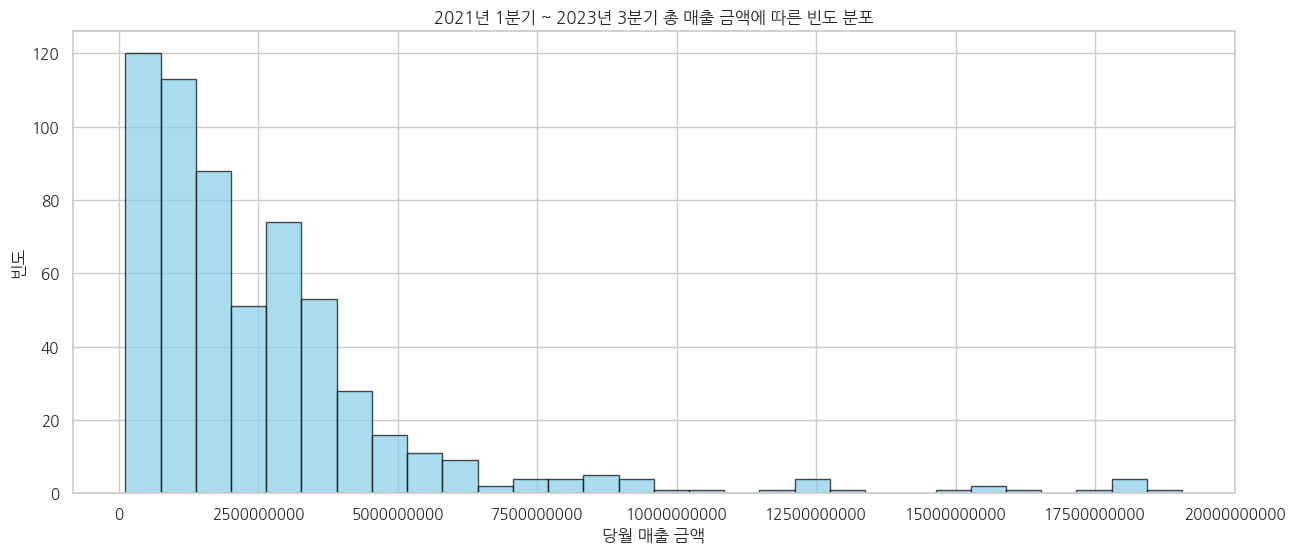

In [189]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(15, 6))

# Plotting the histogram with scaled heights
counts, bins, _ = plt.hist(df['당월_매출_금액'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, weights=np.ones(len(df['당월_매출_금액'])) / 6)

# Adding labels and title
plt.xlabel('당월 매출 금액')
plt.ylabel('빈도')
plt.title('2021년 1분기 ~ 2023년 3분기 총 매출 금액에 따른 빈도 분포')

# Formatting x-axis ticks without scientific notation
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

### 평균 당월 매출 금액 - 년도, 분기

C:\Users\imhye\AppData\Local\Temp\ipykernel_14860\565368514.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='기준_분기', y='당월_매출_금액', hue='기준_년도', data=df_avg_quarterly, marker='o', ci=None)
C:\Users\imhye\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imhye\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\imhye\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pas

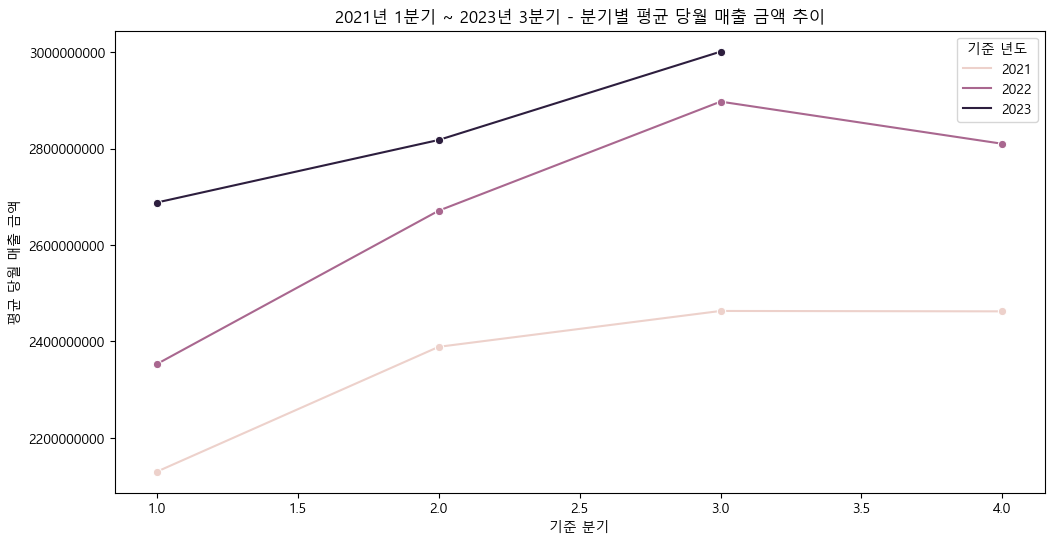

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2021년 1분기부터 2023년까지의 데이터 추출
df_subset = df[(df['기준_년도'] >= 2021) & (df['기준_년도'] <= 2023)]

# Calculate average sales amount for each quarter
df_avg_quarterly = df_subset.groupby(['기준_년도', '기준_분기'])['당월_매출_금액'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='기준_분기', y='당월_매출_금액', hue='기준_년도', data=df_avg_quarterly, marker='o', ci=None)

# Formatting y-axis ticks without scientific notation
plt.ticklabel_format(axis='y', style='plain')

plt.title('2021년 1분기 ~ 2023년 3분기 - 분기별 평균 당월 매출 금액 추이')
plt.xlabel('기준 분기')
plt.ylabel('평균 당월 매출 금액')
plt.legend(title='기준 년도')
plt.show()

### 평균 당월 매출 금액 - 상권_구분_코드_명

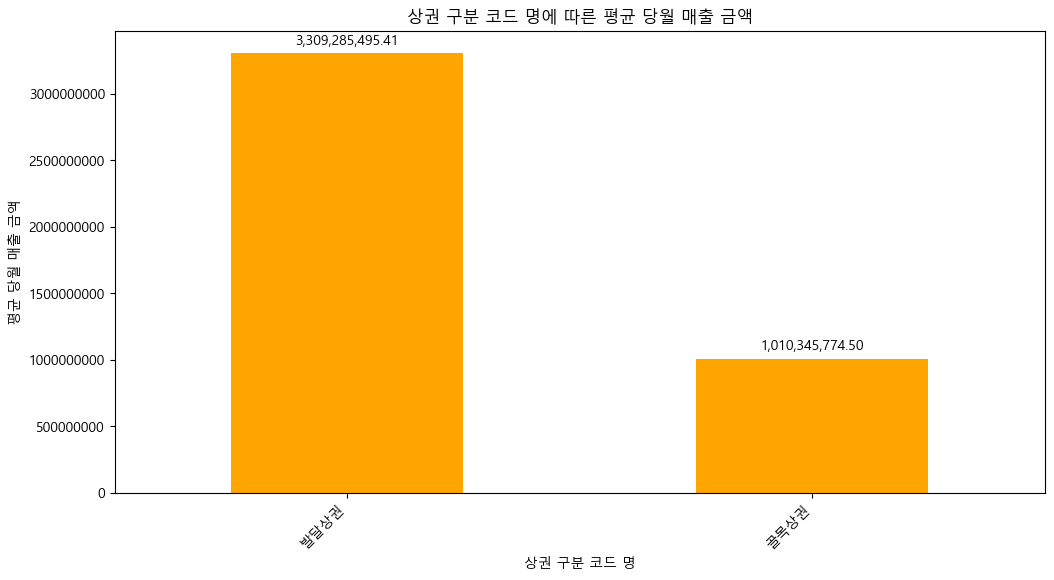

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by '상권_구분_코드_명' and calculate the mean of monthly sales
average_monthly_sales_by_market_type = df.groupby('상권_구분_코드_명')['당월_매출_금액'].mean()

# Visualization
plt.figure(figsize=(12, 6))
bar_plot = average_monthly_sales_by_market_type.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('상권 구분 코드 명에 따른 평균 당월 매출 금액')
plt.xlabel('상권 구분 코드 명')
plt.ylabel('평균 당월 매출 금액')
plt.xticks(rotation=45, ha='right')

# Add annotations on top of the bars
for i, value in enumerate(average_monthly_sales_by_market_type.sort_values(ascending=False)):
    bar_plot.text(i, value + 0.02 * max(average_monthly_sales_by_market_type), f'{value:,.2f}', ha='center')

# y 축 단위를 전체로 설정
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.show()

### 평균 당월 매출 금액 - 행정동_코드_명

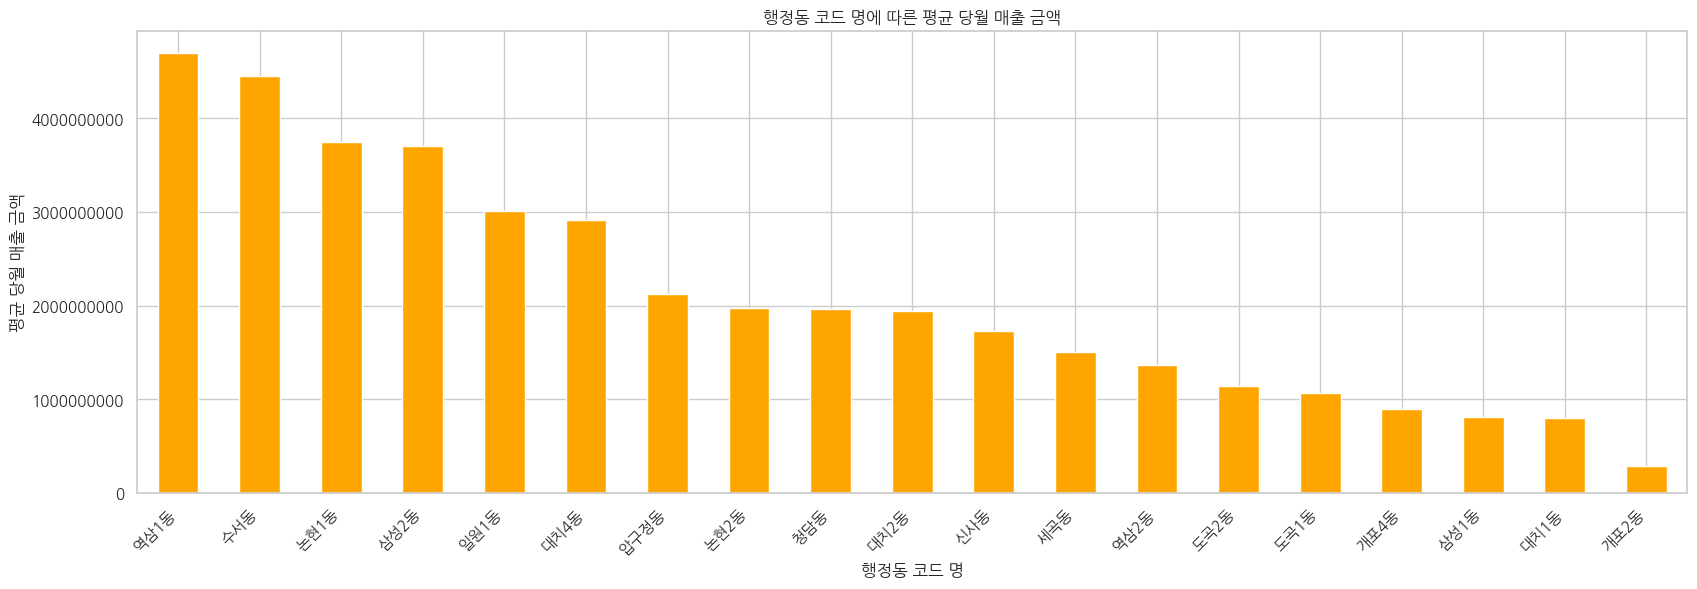

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by '행정동_코드_명' and calculate the mean of monthly sales
average_monthly_sales_by_market_type = df.groupby('행정동_코드_명')['당월_매출_금액'].mean()

# Visualization
plt.figure(figsize=(20, 6))
bar_plot = average_monthly_sales_by_market_type.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('행정동 코드 명에 따른 평균 당월 매출 금액')
plt.xlabel('행정동 코드 명')
plt.ylabel('평균 당월 매출 금액')
plt.xticks(rotation=45, ha='right')

# y 축 단위를 전체로 설정
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.show()

### 평균 당월 매출 금액 - 상권 코드 명

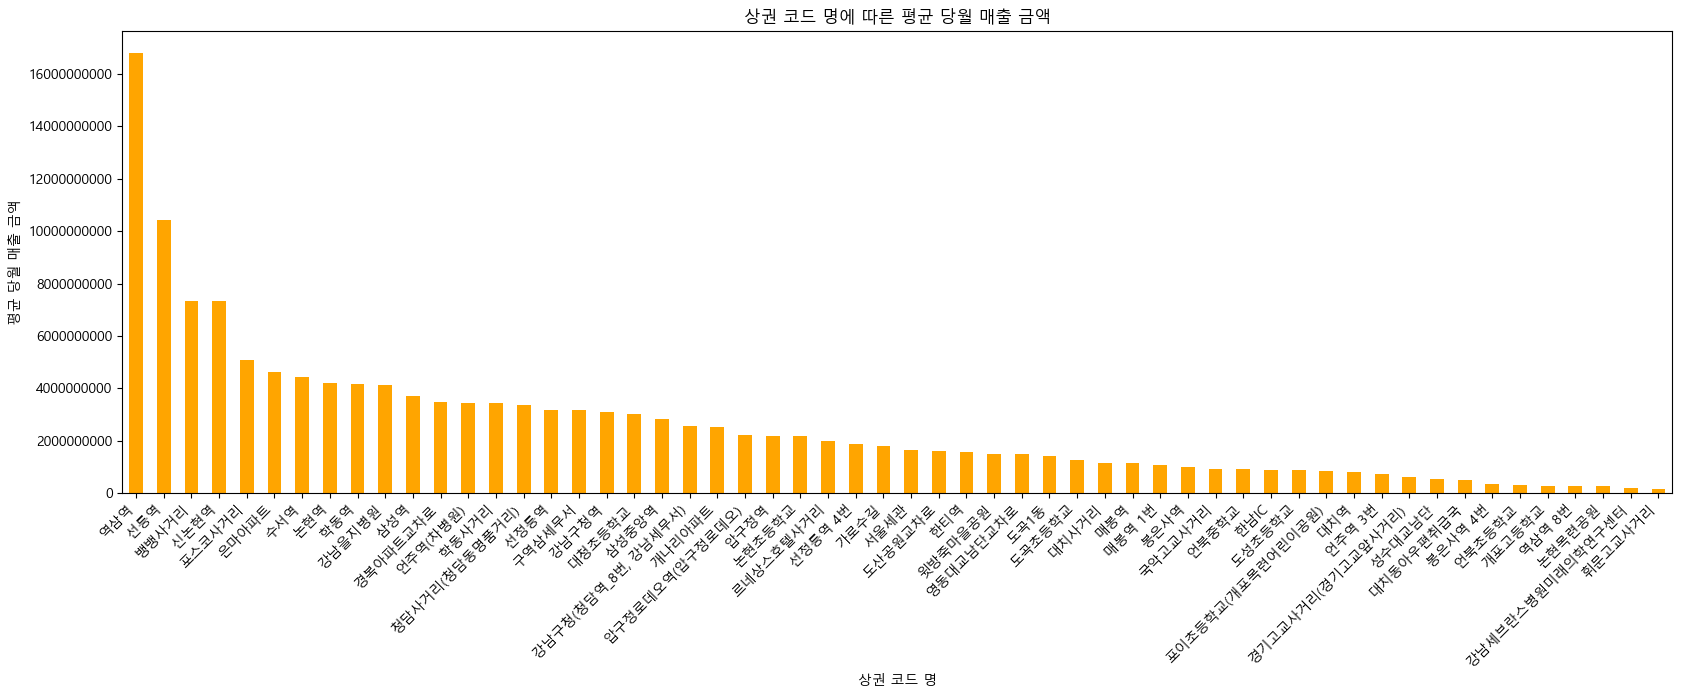

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by '상권_구분_코드_명' and calculate the mean of monthly sales
average_monthly_sales_by_market_type = df.groupby('상권_코드_명')['당월_매출_금액'].mean()

# Visualization
plt.figure(figsize=(20, 6))
bar_plot = average_monthly_sales_by_market_type.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('상권 코드 명에 따른 평균 당월 매출 금액')
plt.xlabel('상권 코드 명')
plt.ylabel('평균 당월 매출 금액')
plt.xticks(rotation=45, ha='right')

# y 축 단위를 전체로 설정
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.show()

## 독립변수 시각화

### 주중_매출_금액, 주말_매출_금액

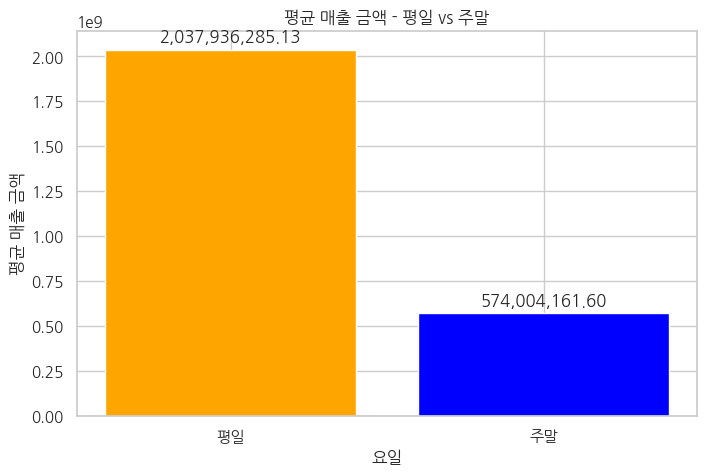

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average of weekday and weekend sales amounts
average_weekday_sales = df['주중_매출_금액'].mean()
average_weekend_sales = df['주말_매출_금액'].mean()

# Visualization
sns.set(style="whitegrid")

# Use a font that supports Korean characters
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(8, 5))

# Bar plot for average sales
plt.bar(['평일', '주말'], [average_weekday_sales, average_weekend_sales], color=['orange', 'blue'])

plt.xlabel('요일')
plt.ylabel('평균 매출 금액')
plt.title('평균 매출 금액 - 평일 vs 주말')

# Display the average sales amounts on top of the bars
for i, value in enumerate([average_weekday_sales, average_weekend_sales]):
    plt.text(i, value + 0.02 * max(average_weekday_sales, average_weekend_sales), f'{value:,.2f}', ha='center')

plt.show()

### 요일_매출_금액

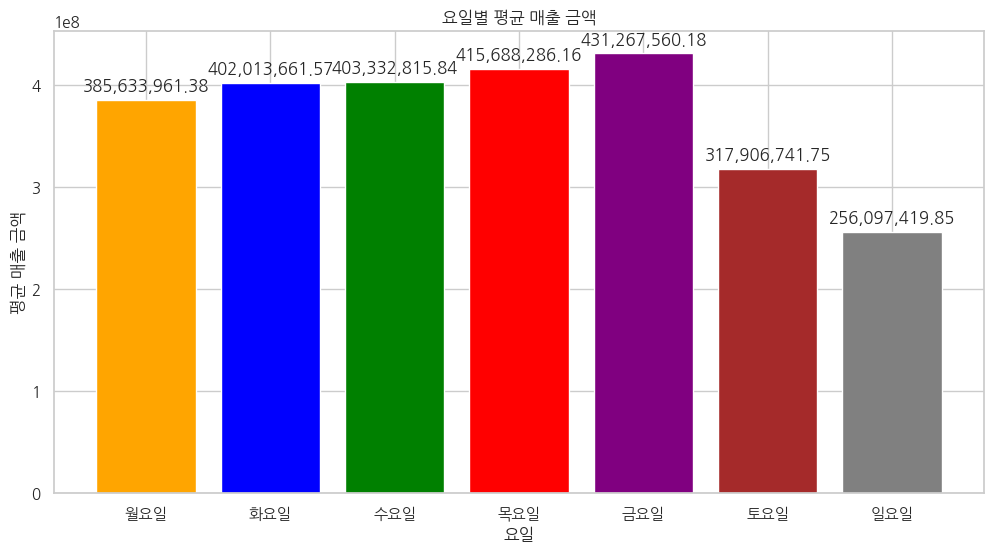

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 6))

# Days of the week
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

# Bar plot for daily sales amounts
sales_amounts = [df[f'{day}_매출_금액'].mean() for day in days]

plt.bar(days, sales_amounts, color=['orange', 'blue', 'green', 'red', 'purple', 'brown', 'gray'])

plt.xlabel('요일')
plt.ylabel('평균 매출 금액')
plt.title('요일별 평균 매출 금액')

# Display the average sales amounts on top of the bars
for i, value in enumerate(sales_amounts):
    plt.text(i, value + 0.02 * max(sales_amounts), f'{value:,.2f}', ha='center')

plt.show()

### 시간대_매출_금액

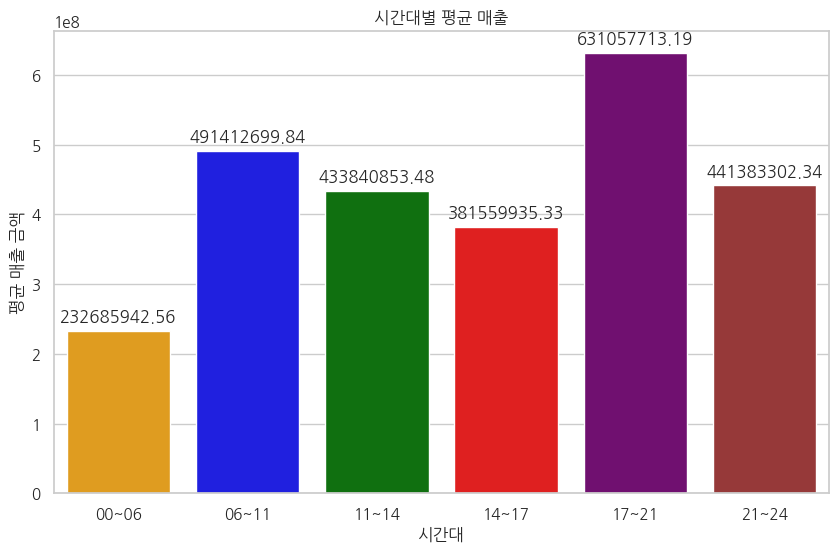

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시간대별 평균 매출 계산
average_sales_by_time = df.groupby('시간대')['시간대_매출_금액'].mean().reset_index()

# 사용할 색상 리스트
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown']

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='시간대', y='시간대_매출_금액', data=average_sales_by_time, palette=colors)
plt.title('시간대별 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출 금액')

# 각 막대에 값을 표시
for p, value in zip(ax.patches, average_sales_by_time['시간대_매출_금액']):
    ax.annotate(f'{value:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### 연령대_매출_금액

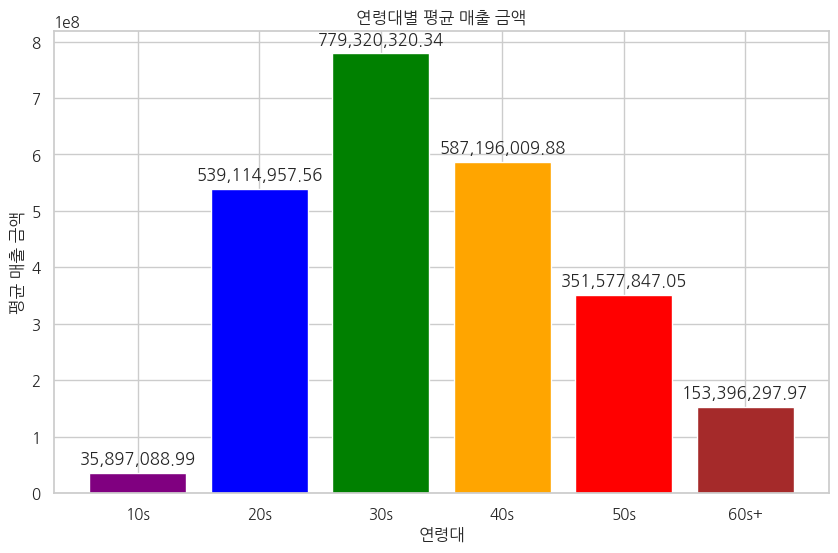

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# 시각화 크기 설정
plt.figure(figsize=(10, 6))

# 연령대 그룹
age_groups = ['10', '20', '30', '40', '50', '60_이상']

# x축에 사용할 영문 이름
english_age_groups = ['10s', '20s', '30s', '40s', '50s', '60s+']

# 연령대별 평균 매출 금액
sales_amounts = [df[f'연령대_{age}_매출_금액'].mean() for age in age_groups]

# 막대 그래프 그리기
plt.bar(english_age_groups, sales_amounts, color=['purple', 'blue', 'green', 'orange', 'red', 'brown'])

# x축 및 y축 레이블 설정
plt.xlabel('연령대')
plt.ylabel('평균 매출 금액')
plt.title('연령대별 평균 매출 금액')

# 각 막대 위에 평균 매출 금액 표시
for i, value in enumerate(sales_amounts):
    plt.text(i, value + 0.02 * max(sales_amounts), f'{value:,.2f}', ha='center')

plt.show()

### 당월_매출_건수

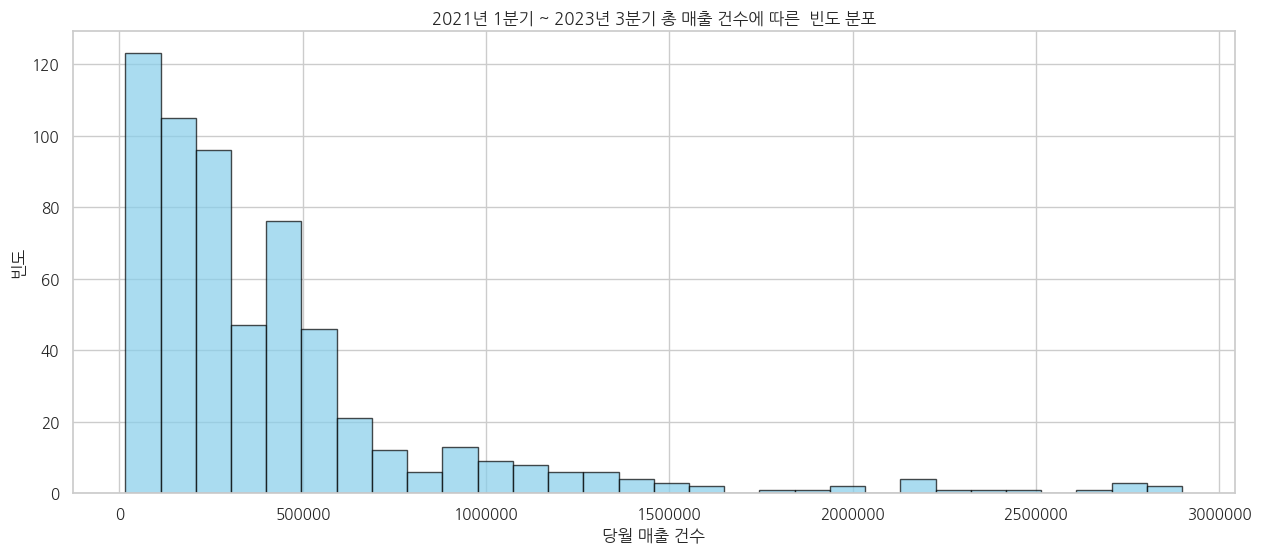

In [188]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(15, 6))

# Plotting the histogram with scaled heights
counts, bins, _ = plt.hist(df['당월_매출_건수'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, weights=np.ones(len(df['당월_매출_금액'])) / 6)

# Adding labels and title
plt.xlabel('당월 매출 건수')
plt.ylabel('빈도')
plt.title('2021년 1분기 ~ 2023년 3분기 총 매출 건수에 따른  빈도 분포')

# Formatting x-axis ticks without scientific notation
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

### 주중_매출_건수, 주말_매출_건수

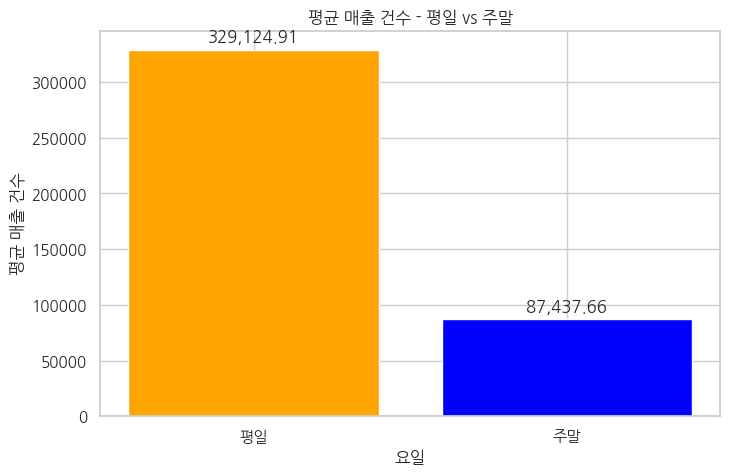

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average of weekday and weekend sales amounts
average_weekday_sales = df['주중_매출_건수'].mean()
average_weekend_sales = df['주말_매출_건수'].mean()

# Visualization
sns.set(style="whitegrid")

# Use a font that supports Korean characters
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(8, 5))

# Bar plot for average sales
plt.bar(['평일', '주말'], [average_weekday_sales, average_weekend_sales], color=['orange', 'blue'])

plt.xlabel('요일')
plt.ylabel('평균 매출 건수')
plt.title('평균 매출 건수 - 평일 vs 주말')

# Display the average sales amounts on top of the bars
for i, value in enumerate([average_weekday_sales, average_weekend_sales]):
    plt.text(i, value + 0.02 * max(average_weekday_sales, average_weekend_sales), f'{value:,.2f}', ha='center')

plt.show()

### 요일_매출_건수

### 시간대_매출_건수

### 연령대_매출_건수

### 영역_면적

### 총_유동인구_수

### 연령대_유동인구_수

### 시간대_유동인구_수

### 요일_유동인구_수

### 총_상주인구_수

### 연령대_상주인구_수

### 총_가구_수

### 총_직장인구_수

### 연령대_직장인구_수

### 월_평균_소득_금액

### 소득_구간_코드

### 지출_총_금액

### 유형_지출_총_금액

### 시설_수